In [147]:
import pandas as pd

In [148]:
data = pd.read_excel("E:\大学/数据.xlsx")

In [149]:
data

,样本编号,城市,地区,Q101,Q102,Q201,Q202,Q301,Q302,Q401,...,Q901,Q902,Qc1,Qc2,Q3c,Qc4,Qc5,Qc6,Qc7,filter_$
0,51,安庆,安徽,2,3,2,3,3,3,3,...,2,2,2,3,1,2,3,5,2,0
1,53,阜阳,安徽,2,3,1,2,2,3,2,...,3,1,2,2,2,1,1,7,2,0
2,131,合肥,安徽,3,4,3,3,2,3,2,...,2,2,1,5,2,2,2,6,2,1
3,168,淮南,安徽,3,3,4,3,4,3,4,...,5,4,2,2,2,2,3,7,2,1
4,229,阜阳,安徽,3,2,3,4,3,2,3,...,1,3,2,2,2,1,1,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208,1155,重庆,重庆,2,3,4,3,3,3,3,...,4,5,2,1,2,1,7,2,1,1
1209,1162,重庆,重庆,2,2,3,2,3,2,3,...,4,3,1,2,2,1,7,1,1,0
1210,1418,重庆,重庆,2,3,4,3,3,3,3,...,3,4,1,6,4,2,5,3,2,0
1211,1486,重庆,重庆,2,4,4,4,3,5,3,...,4,4,1,1,2,1,7,1,2,1


## 查看表头列名

In [150]:
data.columns

Index(['样本编号', '城市', '地区', 'Q101', 'Q102', 'Q201', 'Q202', 'Q301', 'Q302',
       'Q401', 'Q402', 'Q501', 'Q502', 'Q601', 'Q602', 'Q701', 'Q702', 'Q801',
       'Q802', 'Q901', 'Q902', 'Qc1', 'Qc2', 'Q3c', 'Qc4', 'Qc5', 'Qc6', 'Qc7',
       'filter_$'],
      dtype='object')

## 计算指数核心实现逻辑

In [151]:
class CCCI():
    def caluate_index(self, group_col_name, now_time, next_three_months):
        weight_value = pd.DataFrame({"序号": [1, 2, 3, 4, 5, 6], "权重": [200, 150, 100, 50, 0, 0]})
        temp = []
        for index_id, grouped in data.groupby(group_col_name):
            data_Q101 = grouped[now_time].value_counts().reset_index()
            data_Q101["percentage_now"] = data_Q101[now_time] / data_Q101[now_time].sum()
            result_now = pd.merge(data_Q101, weight_value, left_on="index", right_on="序号", how="left")
            result_now["score_now"] = result_now["percentage_now"] * result_now["权重"]
            score_now = result_now["score_now"].sum()

            data_Q102 = grouped[next_three_months].value_counts().reset_index()
            data_Q102["percentage_now"] = data_Q102[next_three_months] / data_Q102[next_three_months].sum()
            result_exp = pd.merge(data_Q102, weight_value, left_on="index", right_on="序号", how="left")
            result_exp["score_exp"] = result_exp["percentage_now"] * result_exp["权重"]
            score_exp = result_exp["score_exp"].sum()

            total_score = 0.4 * score_now + 0.6 * score_exp  # 满意指数予以0.4的加权，未来三个月的预期指数则予以0.6的加权，消费者信心总指数即为各项分指数的加权平均。

            temp.append([score_now, score_exp, total_score])

        return temp

## 1. 性别

In [152]:
sex = pd.DataFrame()
col_list = ["经济", "就业", "物价", "生活", "房产", "投资股票", "收入", "储蓄", "房价走势"]
for k in range(1, 10):
    now_time = "Q" + str(k) + "01"
    next_three_months = "Q" + str(k) + "02"
    group_col_name = ["Qc1"]
    
    res = CCCI().caluate_index(group_col_name, now_time, next_three_months)
    
    tuples = [(col_list[k-1],'满意指数'), (col_list[k-1],'预期指数'), (col_list[k-1],'总指数')]
    tuples_col = [('性别','男生'), ('性别','女生')]
    
    col = pd.MultiIndex.from_tuples(tuples)  
    index = pd.MultiIndex.from_tuples(tuples_col) 

    a = pd.DataFrame(res, index=index, columns=col).T
    
    sex = pd.concat([sex, a])

In [153]:
sex

性别            
                   男生          女生
经济   满意指数  120.155709  119.685039
     预期指数  116.608997  113.543307
     总指数   118.027682  116.000000
就业   满意指数  108.477509  103.543307
     预期指数  115.830450  108.031496
     总指数   112.889273  106.236220
物价   满意指数  106.574394   99.370079
     预期指数  108.996540  105.511811
     总指数   108.027682  103.055118
生活   满意指数  116.003460  111.181102
     预期指数  117.387543  111.338583
     总指数   116.833910  111.275591
房产   满意指数   96.193772   96.220472
     预期指数  115.224913  115.196850
     总指数   107.612457  107.606299
投资股票 满意指数   89.532872   81.023622
     预期指数  100.519031   94.566929
     总指数    96.124567   89.149606
收入   满意指数   82.352941   82.677165
     预期指数   80.449827   78.976378
     总指数    81.211073   80.456693
储蓄   满意指数   93.685121   89.921260
     预期指数   91.176471   91.653543
     总指数    92.179931   90.960630
房价走势 满意指数   75.173010   67.716535
     预期指数   84.688581   72.598425
     总指数    80.882353   70.645669

In [154]:
temp = sex.T

In [155]:
temp

经济                                  就业                          \
             满意指数        预期指数         总指数        满意指数        预期指数         总指数   
性别 男生  120.155709  116.608997  118.027682  108.477509  115.830450  112.889273   
   女生  119.685039  113.543307  116.000000  103.543307  108.031496  106.236220   

               物价                                  生活  ...       投资股票  \
             满意指数        预期指数         总指数        满意指数  ...        总指数   
性别 男生  106.574394  108.996540  108.027682  116.003460  ...  96.124567   
   女生   99.370079  105.511811  103.055118  111.181102  ...  89.149606   

              收入                               储蓄                        \
            满意指数       预期指数        总指数       满意指数       预期指数        总指数   
性别 男生  82.352941  80.449827  81.211073  93.685121  91.176471  92.179931   
   女生  82.677165  78.976378  80.456693  89.921260  91.653543  90.960630   

            房价走势                        
            满意指数       预期指数        总指数  
性别 男生  75.173010  84.688581  80.882353  
   女生  67.716535  72.598425  70.645669  

[2 rows x 27 columns]

## 例1. 将男生数据用指数直方图的可视化方式展示

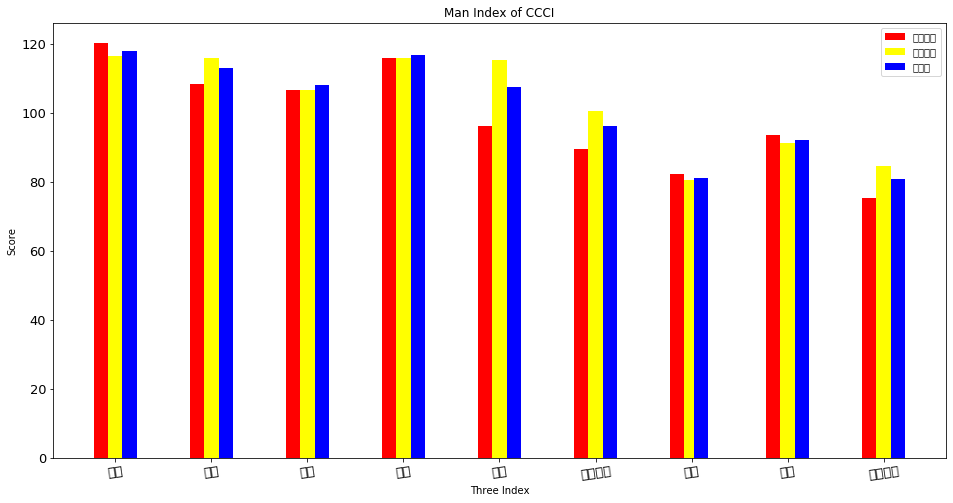

In [156]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

plt.figure(figsize=(16, 8))
 
plt.xlabel('Three Index')#设置x轴标签
plt.ylabel('Score')#设置y轴标签
plt.title('Man Index of CCCI')#设置图表标题
 
#设置x轴刻度为特定文本

group_labels = ["经济", "就业", "物价", "生活", "房产", "投资股票", "收入", "储蓄", "房价走势"]
x = [21.5, 41.5, 61.5, 81.5, 101.5, 121.5, 141.5, 161.5, 181.5] # 设置x轴初始（主）刻度
x1 = [18.5, 38.5, 58.5, 78.5, 98.5, 118.5, 138.5, 158.5, 178.5] # 双柱直方图的柱一
x2 = [21.5, 41.5, 61.5, 81.5, 101.5, 121.5, 141.5, 161.5, 181.5] # 双柱直方图的柱二
x3 = [24.5, 44.5, 64.5, 84.5, 104.5, 124.5, 143.5, 164.5, 184.5] # 双柱直方图的柱二
 
y1=[temp["经济"]["满意指数"][0], temp["就业"]["满意指数"][0], temp["物价"]["满意指数"][0], temp["生活"]["满意指数"][0], temp["房产"]["满意指数"][0], temp["投资股票"]["满意指数"][0], temp["收入"]["满意指数"][0], temp["储蓄"]["满意指数"][0], temp["房价走势"]["满意指数"][0]] # 柱一的高度
y2=[temp["经济"]["预期指数"][0], temp["就业"]["预期指数"][0], temp["物价"]["满意指数"][0], temp["生活"]["满意指数"][0], temp["房产"]["预期指数"][0], temp["投资股票"]["预期指数"][0], temp["收入"]["预期指数"][0], temp["储蓄"]["预期指数"][0], temp["房价走势"]["预期指数"][0]] # 柱二的高度
y3=[temp["经济"]["总指数"][0], temp["就业"]["总指数"][0], temp["物价"]["总指数"][0], temp["生活"]["总指数"][0], temp["房产"]["总指数"][0], temp["投资股票"]["总指数"][0], temp["收入"]["总指数"][0], temp["储蓄"]["总指数"][0], temp["房价走势"]["总指数"][0]] # 柱三的高度
 
plt.bar(x1, y1, facecolor='red', width=3, label = '满意指数')
plt.bar(x2, y2, facecolor='yellow', width=3, label = '预期指数')
plt.bar(x3, y3, facecolor='blue', width=3, label = '总指数')


plt.xticks(x, group_labels, rotation=8)#将x轴刻度替换为特定文本
plt.tick_params(labelsize=13) #刻度字体大小13
plt.legend()#显示图例
plt.show()

## 例2. 将女生数据用指数直方图的可视化方式展示

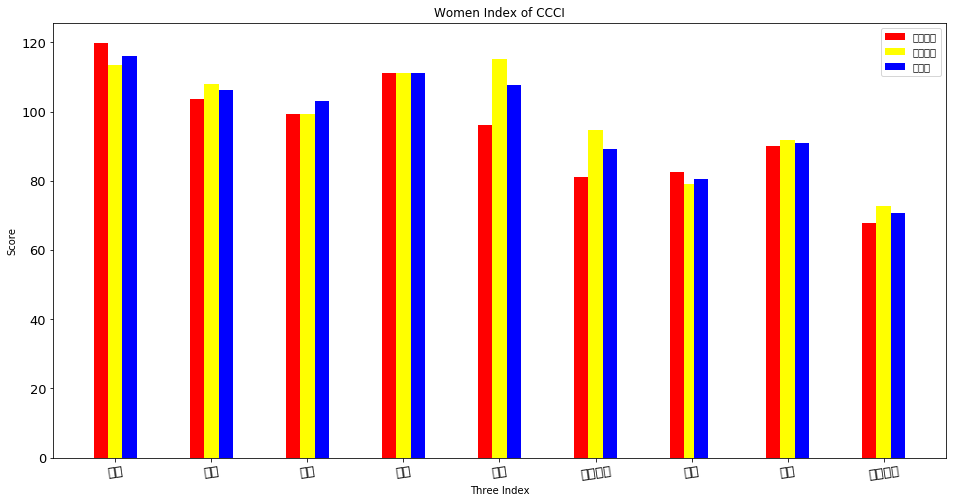

In [157]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

plt.figure(figsize=(16, 8))
 
plt.xlabel('Three Index')#设置x轴标签
plt.ylabel('Score')#设置y轴标签
plt.title('Women Index of CCCI')#设置图表标题
 
#设置x轴刻度为特定文本

group_labels = ["经济", "就业", "物价", "生活", "房产", "投资股票", "收入", "储蓄", "房价走势"]
x = [21.5, 41.5, 61.5, 81.5, 101.5, 121.5, 141.5, 161.5, 181.5] # 设置x轴初始（主）刻度
x1 = [18.5, 38.5, 58.5, 78.5, 98.5, 118.5, 138.5, 158.5, 178.5] # 双柱直方图的柱一
x2 = [21.5, 41.5, 61.5, 81.5, 101.5, 121.5, 141.5, 161.5, 181.5] # 双柱直方图的柱二
x3 = [24.5, 44.5, 64.5, 84.5, 104.5, 124.5, 143.5, 164.5, 184.5] # 双柱直方图的柱二
 
y1=[temp["经济"]["满意指数"][1], temp["就业"]["满意指数"][1], temp["物价"]["满意指数"][1], temp["生活"]["满意指数"][1], temp["房产"]["满意指数"][1], temp["投资股票"]["满意指数"][1], temp["收入"]["满意指数"][1], temp["储蓄"]["满意指数"][1], temp["房价走势"]["满意指数"][1]] # 柱一的高度
y2=[temp["经济"]["预期指数"][1], temp["就业"]["预期指数"][1], temp["物价"]["满意指数"][1], temp["生活"]["满意指数"][1], temp["房产"]["预期指数"][1], temp["投资股票"]["预期指数"][1], temp["收入"]["预期指数"][1], temp["储蓄"]["预期指数"][1], temp["房价走势"]["预期指数"][1]] # 柱二的高度
y3=[temp["经济"]["总指数"][1], temp["就业"]["总指数"][1], temp["物价"]["总指数"][1], temp["生活"]["总指数"][1], temp["房产"]["总指数"][1], temp["投资股票"]["总指数"][1], temp["收入"]["总指数"][1], temp["储蓄"]["总指数"][1], temp["房价走势"]["总指数"][1]] # 柱三的高度

plt.bar(x1, y1, facecolor='red', width=3, label = '满意指数')
plt.bar(x2, y2, facecolor='yellow', width=3, label = '预期指数')
plt.bar(x3, y3, facecolor='blue', width=3, label = '总指数')


plt.xticks(x, group_labels, rotation=8)#将x轴刻度替换为特定文本
plt.tick_params(labelsize=13) #刻度字体大小13
plt.legend()#显示图例
plt.show()

## 2. 年龄

In [158]:
age = pd.DataFrame()
col_list = ["经济", "就业", "物价", "生活", "房产", "投资股票", "收入", "储蓄", "房价走势"]
for k in range(1, 10):
    now_time = "Q" + str(k) + "01"
    next_three_months = "Q" + str(k) + "02"
    group_col_name = ["Qc2"]
    
    
    res = CCCI().caluate_index(group_col_name, now_time, next_three_months)
    
    tuples = [(col_list[k-1],'满意指数'), (col_list[k-1],'预期指数'), (col_list[k-1],'总指数')]
    tuples_col = [('年龄','22岁以下'), ('年龄','23～30'), ('年龄','31～40'), ('年龄','41～50'), ('年龄','51-60'), ('年龄','60以上'),('年龄','未知') ]
    
    # 双重索引index
    col = pd.MultiIndex.from_tuples(tuples)
    
    # 双重索引columns
    index = pd.MultiIndex.from_tuples(tuples_col)
    
    a = pd.DataFrame(res, index=index, columns=col).T
    
    age = pd.concat([age, a])

In [159]:
age

年龄                                                  \
                22岁以下       23～30       31～40       41～50       51-60   
经济   满意指数  122.240803  122.576531  116.225166  115.591398  124.444444   
     预期指数  118.561873  113.265306  111.258278  119.892473  117.777778   
     总指数   120.033445  116.989796  113.245033  118.172043  120.444444   
就业   满意指数  109.531773  106.632653  105.794702  107.526882  106.666667   
     预期指数  110.367893  113.392857  111.423841  118.817204  111.111111   
     总指数   110.033445  110.688776  109.172185  114.301075  109.333333   
物价   满意指数  100.836120  100.127551  106.622517  103.225806  110.000000   
     预期指数  102.006689  107.015306  112.086093  110.752688  108.888889   
     总指数   101.538462  104.260204  109.900662  107.741935  109.333333   
生活   满意指数  111.371237  111.352041  115.397351  115.053763  122.222222   
     预期指数  113.545151  112.882653  116.887417  116.129032  114.444444   
     总指数   112.675585  112.270408  116.291391  115.698925  117.555556   
房产   满意指数  110.033445   92.346939   89.900662   83.870968   98.888889   
     预期指数  117.056856  118.750000  115.894040  113.440860  108.888889   
     总指数   114.247492  108.188776  105.496689  101.612903  104.888889   
投资股票 满意指数   89.130435   83.928571   86.092715   76.344086   82.222222   
     预期指数   98.996656  100.637755   97.350993   87.634409   96.666667   
     总指数    95.050167   93.954082   92.847682   83.118280   90.888889   
收入   满意指数   80.434783   90.688776   87.086093   77.956989   82.222222   
     预期指数   78.093645   87.372449   82.947020   77.419355   80.000000   
     总指数    79.030100   88.698980   84.602649   77.634409   80.888889   
储蓄   满意指数   94.481605   94.515306   93.708609   88.172043   87.777778   
     预期指数   90.133779   97.321429   95.198675   89.247312   84.444444   
     总指数    91.872910   96.198980   94.602649   88.817204   85.777778   
房价走势 满意指数   65.551839   75.127551   77.483444   77.956989   78.888889   
     预期指数   74.247492   83.545918   86.423841   79.569892   77.777778   
     总指数    70.769231   80.178571   82.847682   78.924731   78.222222   

                                   
                 60以上          未知  
经济   满意指数  118.518519  107.142857  
     预期指数  122.222222  107.142857  
     总指数   120.740741  107.142857  
就业   满意指数   84.259259   92.857143  
     预期指数  100.000000  107.142857  
     总指数    93.703704  101.428571  
物价   满意指数  104.629630  103.571429  
     预期指数  105.555556  100.000000  
     总指数   105.185185  101.428571  
生活   满意指数  125.000000  103.571429  
     预期指数  114.814815  103.571429  
     总指数   118.888889  103.571429  
房产   满意指数  104.629630   91.071429  
     预期指数   99.074074   85.714286  
     总指数   101.296296   87.857143  
投资股票 满意指数   88.888889   73.214286  
     预期指数   94.444444   75.000000  
     总指数    92.222222   74.285714  
收入   满意指数   35.185185   48.214286  
     预期指数   34.259259   48.214286  
     总指数    34.629630   48.214286  
储蓄   满意指数   67.592593   66.071429  
     预期指数   64.814815   51.785714  
     总指数    65.925926   57.500000  
房价走势 满意指数   32.407407   51.785714  
     预期指数   29.629630   53.571429  
     总指数    30.740741   52.857143

## 3. 学历

In [160]:
education = pd.DataFrame()
col_list = ["经济", "就业", "物价", "生活", "房产", "投资股票", "收入", "储蓄", "房价走势"]
for k in range(1, 10):
    now_time = "Q" + str(k) + "01"
    next_three_months = "Q" + str(k) + "02"
    group_col_name = ["Q3c"]
    
    res = CCCI().caluate_index(group_col_name, now_time, next_three_months)
    
    tuples = [(col_list[k-1],'满意指数'), (col_list[k-1],'预期指数'), (col_list[k-1],'总指数')]
    tuples_col = [('学历','大专以下'), ('学历','大专及本科'), ('学历','硕士及以上'), ('学历', '未知')]
    
    # 双重索引index
    col = pd.MultiIndex.from_tuples(tuples)
    
    # 双重索引columns
    index = pd.MultiIndex.from_tuples(tuples_col)
    
    a = pd.DataFrame(res, index=index, columns=col).T
    
    education = pd.concat([education, a])

In [161]:
education

学历                                    
                 大专以下       大专及本科       硕士及以上          未知
经济   满意指数  119.148936  120.044297  123.979592  114.084507
     预期指数  120.567376  115.116279  112.244898  106.338028
     总指数   120.000000  117.087486  116.938776  109.436620
就业   满意指数  105.673759  106.090808  109.183673   99.295775
     预期指数  110.638298  112.624585  114.795918   98.591549
     总指数   108.652482  110.011074  112.551020   98.873239
物价   满意指数   97.517730  103.045404  112.755102   96.478873
     预期指数  103.546099  108.859358  107.142857   92.957746
     总指数   101.134752  106.533776  109.387755   94.366197
生活   满意指数  116.312057  113.953488  113.265306  102.112676
     预期指数  116.666667  115.559247  111.224490   96.478873
     总指数   116.524823  114.916944  112.040816   98.732394
房产   满意指数  103.900709   95.957918   97.448980   82.394366
     预期指数  109.219858  116.998893  117.346939  101.408451
     总指数   107.092199  108.582503  109.387755   93.802817
投资股票 满意指数   84.397163   85.825028   90.306122   69.718310
     预期指数   98.936170   98.781838   96.428571   78.169014
     总指数    93.120567   93.599114   93.979592   74.788732
收入   满意指数   76.595745   83.167220   91.836735   73.239437
     预期指数   74.468085   81.284607   88.775510   57.042254
     总指数    75.319149   82.037652   90.000000   63.521127
储蓄   满意指数   89.716312   91.860465   92.857143   92.253521
     预期指数   88.652482   92.469546   87.244898   89.436620
     总指数    89.078014   92.225914   89.489796   90.563380
房价走势 满意指数   63.829787   72.369878   81.122449   58.450704
     预期指数   64.184397   81.672204   86.224490   53.521127
     总指数    64.042553   77.951274   84.183673   55.492958

## 4. 婚姻状况

In [162]:
marriage = pd.DataFrame()
col_list = ["经济", "就业", "物价", "生活", "房产", "投资股票", "收入", "储蓄", "房价走势"]
for k in range(1, 10):
    now_time = "Q" + str(k) + "01"
    next_three_months = "Q" + str(k) + "02"
    group_col_name = ["Qc4"]
    
    res = CCCI().caluate_index(group_col_name, now_time, next_three_months)
    
    tuples = [(col_list[k-1],'满意指数'), (col_list[k-1],'预期指数'), (col_list[k-1],'总指数')]
    tuples_col = [('婚姻状况','未婚'), ('婚姻状况','已婚'), ('婚姻状况', '未知')]
    
    # 双重索引index
    col = pd.MultiIndex.from_tuples(tuples)
    
    # 双重索引columns
    index = pd.MultiIndex.from_tuples(tuples_col)
    
    a = pd.DataFrame(res, index=index, columns=col).T
    
    marriage = pd.concat([marriage, a])

In [163]:
marriage

婚姻状况                        
                   未婚          已婚          未知
经济   满意指数  123.186120  117.782027  102.678571
     预期指数  116.719243  114.435946  100.892857
     总指数   119.305994  115.774379  101.607143
就业   满意指数  107.097792  104.684512  103.571429
     预期指数  111.041009  114.722753   91.964286
     总指数   109.463722  110.707457   96.607143
物价   满意指数   99.684543  107.361377   95.535714
     预期指数  105.362776  110.898662   92.857143
     总指数   103.091483  109.483748   93.928571
生活   满意指数  112.145110  117.208413   93.750000
     预期指数  112.066246  119.120459   92.857143
     总指数   112.097792  118.355641   93.214286
房产   满意指数  101.813880   89.866157   91.964286
     预期指数  116.719243  113.766730  111.607143
     总指数   110.757098  104.206501  103.750000
投资股票 满意指数   88.012618   82.026769   80.357143
     预期指数  100.315457   96.462715   73.214286
     总指数    95.394322   90.688337   76.071429
收入   满意指数   80.757098   84.990440   79.464286
     预期指数   77.050473   84.130019   67.857143
     总指数    78.533123   84.474187   72.500000
储蓄   满意指数   95.741325   86.806883   91.964286
     预期指数   94.479495   88.814532   81.250000
     总指数    94.984227   88.011472   85.535714
房价走势 满意指数   69.321767   74.474187   63.392857
     预期指数   73.974763   85.086042   65.178571
     总指数    72.113565   80.841300   64.464286

## 5. 就业情况

In [164]:
job = pd.DataFrame()
col_list = ["经济", "就业", "物价", "生活", "房产", "投资股票", "收入", "储蓄", "房价走势"]
for k in range(1, 10):
    now_time = "Q" + str(k) + "01"
    next_three_months = "Q" + str(k) + "02"
    group_col_name = ["Qc5"]
    
    res = CCCI().caluate_index(group_col_name, now_time, next_three_months)
    
    tuples = [(col_list[k-1],'满意指数'), (col_list[k-1],'预期指数'), (col_list[k-1],'总指数')]
    tuples_col = [('就业情况','行政机关及事业单位'), ('就业情况','企业'), ('就业情况','个体经营者'), 
                  ('就业情况','其他就业者'), ('就业情况','离退休人员'), ('就业情况','无业'),
                  ('就业情况','在校学生'), ('就业情况','其他非就业者'), ('就业情况','未知')]
    
    # 双重索引index
    col = pd.MultiIndex.from_tuples(tuples)
    
    # 双重索引columns
    index = pd.MultiIndex.from_tuples(tuples_col)
    
    a = pd.DataFrame(res, index=index, columns=col).T     
    job = pd.concat([job, a])

In [165]:
job

就业情况                                                  \
            行政机关及事业单位          企业       个体经营者       其他就业者       离退休人员   
经济   满意指数  124.603175  120.640177  117.142857  113.934426  117.592593   
     预期指数  123.015873  116.666667  108.571429  119.672131  118.518519   
     总指数   123.650794  118.256071  112.000000  117.377049  118.148148   
就业   满意指数  109.523810  106.843267  108.095238  109.836066   91.666667   
     预期指数  116.666667  115.894040  104.761905  118.032787  105.555556   
     总指数   113.809524  112.273731  106.095238  114.754098  100.000000   
物价   满意指数  114.682540  106.181015  106.190476  103.278689  102.777778   
     预期指数  116.666667  112.693157   99.047619   95.901639  101.851852   
     总指数   115.873016  110.088300  101.904762   98.852459  102.222222   
生活   满意指数  121.428571  117.108168  114.285714  110.655738  124.074074   
     预期指数  119.047619  118.211921  113.809524  107.377049  118.518519   
     总指数   120.000000  117.770419  114.000000  108.688525  120.740741   
房产   满意指数   97.222222   90.838852   89.047619   88.524590  100.000000   
     预期指数  113.492063  115.121413  114.761905  116.393443  100.000000   
     总指数   106.984127  105.408389  104.476190  105.245902  100.000000   
投资股票 满意指数   96.428571   87.748344   80.476190   74.590164   88.888889   
     预期指数  103.968254   97.902870   98.571429   95.901639   89.814815   
     总指数   100.952381   93.841060   91.333333   87.377049   89.444444   
收入   满意指数   94.444444   87.969095   87.619048   81.967213   44.444444   
     预期指数   87.698413   85.871965   84.761905   77.049180   39.814815   
     总指数    90.396825   86.710817   85.904762   79.016393   41.666667   
储蓄   满意指数   95.238095   90.728477  105.238095   82.786885   78.703704   
     预期指数   94.841270   92.604857   97.142857   90.163934   73.148148   
     总指数    95.000000   91.854305  100.380952   87.213115   75.370370   
房价走势 满意指数   86.507937   77.924945   86.666667   70.491803   41.666667   
     预期指数   87.698413   88.300221   90.000000   77.049180   31.481481   
     总指数    87.222222   84.150110   88.666667   74.426230   35.555556   

                                                           
                   无业        在校学生      其他非就业者          未知  
经济   满意指数  116.666667  121.304348  111.111111  108.974359  
     预期指数  108.333333  114.057971   97.222222   93.589744  
     总指数   111.666667  116.956522  102.777778   99.743590  
就业   满意指数  108.333333  105.362319  105.555556   94.871795  
     预期指数  104.166667  108.115942   97.222222  106.410256  
     总指数   105.833333  107.014493  100.555556  101.794872  
物价   满意指数  108.333333   95.072464  100.000000   83.333333  
     预期指数   95.833333  104.492754   91.666667   93.589744  
     总指数   100.833333  100.724638   95.000000   89.487179  
生活   满意指数   91.666667  108.985507  100.000000   85.897436  
     预期指数   95.833333  112.318841   97.222222   88.461538  
     总指数    94.166667  110.985507   98.333333   87.435897  
房产   满意指数  116.666667  108.115942   91.666667   71.794872  
     预期指数  120.833333  120.434783  141.666667   82.051282  
     总指数   119.166667  115.507246  121.666667   77.948718  
投资股票 满意指数   70.833333   83.768116   77.777778   60.256410  
     预期指数   83.333333   99.130435   94.444444   70.512821  
     总指数    78.333333   92.985507   87.777778   66.410256  
收入   满意指数   79.166667   77.681159   72.222222   69.230769  
     预期指数   87.500000   76.376812   72.222222   57.692308  
     总指数    84.166667   76.898551   72.222222   62.307692  
储蓄   满意指数  100.000000   91.449275   91.666667   87.179487  
     预期指数   70.833333   93.188406   75.000000   76.923077  
     总指数    82.500000   92.492754   81.666667   81.025641  
房价走势 满意指数    8.333333   62.173913   58.333333   51.282051  
     预期指数   16.666667   71.304348   72.222222   52.564103  
     总指数    13.333333   67.652174   66.666667   52.051282

## 6. 个人上月收入

In [166]:
income = pd.DataFrame()
col_list = ["经济", "就业", "物价", "生活", "房产", "投资股票", "收入", "储蓄", "房价走势"]
for k in range(1, 10):
    now_time = "Q" + str(k) + "01"
    next_three_months = "Q" + str(k) + "02"
    group_col_name = ["Qc6"]
    
    res = CCCI().caluate_index(group_col_name, now_time, next_three_months)    
    
    tuples = [(col_list[k-1],'满意指数'), (col_list[k-1],'预期指数'), (col_list[k-1],'总指数')]
    
    tuples_col = [('个人上月收入','1000元以下'), ('个人上月收入','1000～2000元'), 
                  ('个人上月收入','2000～3000元'), ('个人上月收入','3000～5000元'), 
                  ('个人上月收入','5000～8000元'), ('个人上月收入','8000-10000元'), 
                  ('个人上月收入','10000元以上'), ('个人上月收入','未知')]
    
    # 双重索引index
    col = pd.MultiIndex.from_tuples(tuples)
    # 双重索引columns
    index = pd.MultiIndex.from_tuples(tuples_col)
    
    a = pd.DataFrame(res, index=index, columns=col).T
    income = pd.concat([income, a])

In [167]:
income

个人上月收入                                                  \
              1000元以下  1000～2000元  2000～3000元  3000～5000元  5000～8000元   
经济   满意指数  113.978495  127.985075  120.000000  113.942308  117.753623   
     预期指数  107.795699  122.014925  113.333333  112.500000  117.028986   
     总指数   110.268817  124.402985  116.000000  113.076923  117.318841   
就业   满意指数   97.043011  111.940299  106.666667  104.807692  101.811594   
     预期指数  100.806452  116.791045  115.714286  104.807692  111.231884   
     总指数    99.301075  114.850746  112.095238  104.807692  107.463768   
物价   满意指数   85.752688  109.328358  101.428571   95.192308  101.086957   
     预期指数   94.623656  100.746269  110.952381  100.480769  107.608696   
     总指数    91.075269  104.179104  107.142857   98.365385  105.000000   
生活   满意指数  101.075269  114.925373  109.047619  106.250000  113.768116   
     预期指数  106.451613  114.925373  110.000000  104.326923  111.956522   
     总指数   104.301075  114.925373  109.619048  105.096154  112.681159   
房产   满意指数  106.451613  107.089552   98.095238   80.288462   87.318841   
     预期指数  115.591398  115.298507  117.142857  112.019231  117.391304   
     总指数   111.935484  112.014925  109.523810   99.326923  105.362319   
投资股票 满意指数   76.881720   88.805970   78.571429   83.653846   90.217391   
     预期指数   92.204301   98.134328   94.761905   89.423077   98.550725   
     总指数    86.075269   94.402985   88.285714   87.115385   95.217391   
收入   满意指数   77.688172   82.089552   79.523810   72.115385   89.855072   
     预期指数   78.494624   80.223881   77.619048   73.076923   86.231884   
     总指数    78.172043   80.970149   78.380952   72.692308   87.681159   
储蓄   满意指数   94.354839   87.313433   90.476190   89.903846   97.826087   
     预期指数   95.698925   85.447761   90.000000   93.269231   96.376812   
     总指数    95.161290   86.194030   90.190476   91.923077   96.956522   
房价走势 满意指数   63.172043   66.044776   73.333333   70.673077   77.898551   
     预期指数   69.623656   75.373134   78.571429   78.365385   90.942029   
     总指数    67.043011   71.641791   76.476190   75.288462   85.724638   

                                               
          8000-10000元    10000元以上          未知  
经济   满意指数  124.891775  117.307692  121.069182  
     预期指数  117.748918  111.538462  117.924528  
     总指数   120.606061  113.846154  119.182390  
就业   满意指数  109.740260  105.448718  109.748428  
     预期指数  119.696970  109.615385  113.207547  
     总指数   115.714286  107.948718  111.823899  
物价   满意指数  113.419913  117.628205   94.654088  
     预期指数  120.779221  117.628205   98.742138  
     总指数   117.835498  117.628205   97.106918  
生活   满意指数  123.376623  127.243590  106.289308  
     预期指数  125.974026  121.474359  109.748428  
     总指数   124.935065  123.782051  108.364780  
房产   满意指数   97.402597   88.461538   97.798742  
     预期指数  118.181818  116.025641  108.490566  
     总指数   109.870130  105.000000  104.213836  
投资股票 满意指数   92.207792   90.064103   77.044025  
     预期指数  108.874459  100.641026   88.993711  
     总指数   102.207792   96.410256   84.213836  
收入   满意指数   95.670996   90.064103   64.465409  
     预期指数   90.909091   87.820513   56.289308  
     总指数    92.813853   88.717949   59.559748  
储蓄   满意指数   92.857143   93.910256   85.220126  
     预期指数   97.402597   88.782051   80.817610  
     总指数    95.584416   90.833333   82.578616  
房价走势 满意指数   83.766234   84.615385   47.169811  
     预期指数   93.073593   85.576923   51.572327  
     总指数    89.350649   85.192308   49.811321

## 7. 居住地

In [168]:
residence = pd.DataFrame()
col_list = ["经济", "就业", "物价", "生活", "房产", "投资股票", "收入", "储蓄", "房价走势"]
for k in range(1, 10):
    now_time = "Q" + str(k) + "01"
    next_three_months = "Q" + str(k) + "02"
    group_col_name = ["Qc7"]
    
    res = CCCI().caluate_index(group_col_name, now_time, next_three_months)
    
    tuples = [(col_list[k-1],'满意指数'), (col_list[k-1],'预期指数'), (col_list[k-1],'总指数')]
    tuples_col = [('居住地','城镇'), ('居住地','农村'), ('居住地','未知')]
    # 双重索引index
    index = pd.MultiIndex.from_tuples(tuples)
    # 双重索引columns
    col = pd.MultiIndex.from_tuples(tuples_col)
    
    a = pd.DataFrame(res, index = index, columns = col)
    
    residence = pd.concat([residence, a])

In [169]:
residence

居住地                        
                   城镇          农村          未知
经济   满意指数  116.425993  112.815884  114.259928
     预期指数  121.192053  116.114790  118.145695
     总指数   113.333333  101.666667  106.333333
就业   满意指数  106.678700  109.205776  108.194946
     预期指数  105.905077  113.024283  110.176600
     总指数    98.333333   96.666667   97.333333
物价   满意指数   92.238267   94.945848   93.862816
     预期指数  106.291391  111.092715  109.172185
     总指数    95.000000  101.666667   99.000000
生活   满意指数  100.722022  105.415162  103.537906
     预期指数  118.046358  117.660044  117.814570
     总指数    93.333333   91.666667   92.333333
房产   满意指数  100.722022  113.176895  108.194946
     预期指数   95.033113  116.556291  107.947020
     总指数    90.000000   93.333333   92.000000
投资股票 满意指数   82.310469   94.584838   89.675090
     预期指数   85.871965   98.785872   93.620309
     总指数    86.666667   81.666667   83.666667
收入   满意指数   76.714801   76.173285   76.389892
     预期指数   84.768212   81.677704   82.913907
     总指数    68.333333   51.666667   58.333333
储蓄   满意指数   88.989170   88.086643   88.447653
     预期指数   92.991170   93.101545   93.057395
     总指数    78.333333   71.666667   74.333333
房价走势 满意指数   62.454874   72.743682   68.628159
     预期指数   74.724062   80.960265   78.465784
     总指数    48.333333   51.666667   50.333333

In [170]:
residence.shape

(27, 3)

## 合并数据、保存结果

In [171]:
final_result = pd.concat([sex, age, education, marriage, job, income, residence], axis=1)

In [172]:
final_result

性别                      年龄                          \
                   男生          女生       22岁以下       23～30       31～40   
经济   满意指数  120.155709  119.685039  122.240803  122.576531  116.225166   
     预期指数  116.608997  113.543307  118.561873  113.265306  111.258278   
     总指数   118.027682  116.000000  120.033445  116.989796  113.245033   
就业   满意指数  108.477509  103.543307  109.531773  106.632653  105.794702   
     预期指数  115.830450  108.031496  110.367893  113.392857  111.423841   
     总指数   112.889273  106.236220  110.033445  110.688776  109.172185   
物价   满意指数  106.574394   99.370079  100.836120  100.127551  106.622517   
     预期指数  108.996540  105.511811  102.006689  107.015306  112.086093   
     总指数   108.027682  103.055118  101.538462  104.260204  109.900662   
生活   满意指数  116.003460  111.181102  111.371237  111.352041  115.397351   
     预期指数  117.387543  111.338583  113.545151  112.882653  116.887417   
     总指数   116.833910  111.275591  112.675585  112.270408  116.291391   
房产   满意指数   96.193772   96.220472  110.033445   92.346939   89.900662   
     预期指数  115.224913  115.196850  117.056856  118.750000  115.894040   
     总指数   107.612457  107.606299  114.247492  108.188776  105.496689   
投资股票 满意指数   89.532872   81.023622   89.130435   83.928571   86.092715   
     预期指数  100.519031   94.566929   98.996656  100.637755   97.350993   
     总指数    96.124567   89.149606   95.050167   93.954082   92.847682   
收入   满意指数   82.352941   82.677165   80.434783   90.688776   87.086093   
     预期指数   80.449827   78.976378   78.093645   87.372449   82.947020   
     总指数    81.211073   80.456693   79.030100   88.698980   84.602649   
储蓄   满意指数   93.685121   89.921260   94.481605   94.515306   93.708609   
     预期指数   91.176471   91.653543   90.133779   97.321429   95.198675   
     总指数    92.179931   90.960630   91.872910   96.198980   94.602649   
房价走势 满意指数   75.173010   67.716535   65.551839   75.127551   77.483444   
     预期指数   84.688581   72.598425   74.247492   83.545918   86.423841   
     总指数    80.882353   70.645669   70.769231   80.178571   82.847682   

                                                                   学历  ...  \
                41～50       51-60        60以上          未知        大专以下  ...   
经济   满意指数  115.591398  124.444444  118.518519  107.142857  119.148936  ...   
     预期指数  119.892473  117.777778  122.222222  107.142857  120.567376  ...   
     总指数   118.172043  120.444444  120.740741  107.142857  120.000000  ...   
就业   满意指数  107.526882  106.666667   84.259259   92.857143  105.673759  ...   
     预期指数  118.817204  111.111111  100.000000  107.142857  110.638298  ...   
     总指数   114.301075  109.333333   93.703704  101.428571  108.652482  ...   
物价   满意指数  103.225806  110.000000  104.629630  103.571429   97.517730  ...   
     预期指数  110.752688  108.888889  105.555556  100.000000  103.546099  ...   
     总指数   107.741935  109.333333  105.185185  101.428571  101.134752  ...   
生活   满意指数  115.053763  122.222222  125.000000  103.571429  116.312057  ...   
     预期指数  116.129032  114.444444  114.814815  103.571429  116.666667  ...   
     总指数   115.698925  117.555556  118.888889  103.571429  116.524823  ...   
房产   满意指数   83.870968   98.888889  104.629630   91.071429  103.900709  ...   
     预期指数  113.440860  108.888889   99.074074   85.714286  109.219858  ...   
     总指数   101.612903  104.888889  101.296296   87.857143  107.092199  ...   
投资股票 满意指数   76.344086   82.222222   88.888889   73.214286   84.397163  ...   
     预期指数   87.634409   96.666667   94.444444   75.000000   98.936170  ...   
     总指数    83.118280   90.888889   92.222222   74.285714   93.120567  ...   
收入   满意指数   77.956989   82.222222   35.185185   48.214286   76.595745  ...   
     预期指数   77.419355   80.000000   34.259259   48.214286   74.468085  ...   
     总指数    77.634409   80.888889   34.629630   48.214286   75.319149  ...   
储蓄   满意指数   88.172043   87.777778   67.592593   66.071429   89.716312  ...   
     预期指数   89.247312   84.44

In [173]:
final_result.to_excel("指数计算结果.xlsx")